## 1. Bibliotecas

In [59]:
import pandas as pd
import numpy as np

## 2. Carregando dados

In [60]:
URL = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-Projects-with-Python/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls'
df = pd.read_excel(URL)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 3. Verificando a integridade dos dados

### 3.1 Examinando as colunas

In [61]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### 3.1.1 Dicionário de dados

Verificar na página original do dataset:
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

### 3.2 Confirmando carregamento correto dos dados

In [62]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 3.3 Verificando se todos ID's são únicos

In [63]:
df['ID'].nunique()

29687

### 3.4 Verificando o total de linhas

In [64]:
df.shape[0]

30000

### 3.5 Contagem de repetições dos ID's

In [65]:
id_counts = df['ID'].value_counts()
id_counts.head()

,count
ID,
89f8f447-fca8,2
7c9b7473-cc2f,2
90330d02-82d9,2
75938fec-e5ec,2
2a793ecf-05c6,2


### 3.6 Contagem de ID's que repetiram 2 vezes

In [66]:
id_counts.value_counts()

,count
count,
1,29374
2,313


## 4. Uma análise de dados duplicados

### 4.1 ID's que se repetem

In [67]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

,count
ID,
89f8f447-fca8,True
7c9b7473-cc2f,True
90330d02-82d9,True
75938fec-e5ec,True
2a793ecf-05c6,True


### 4.2 Exibindo os 5 primeiros indices

In [68]:
id_counts.index[:5]

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6'],
      dtype='object', name='ID')

### 4.3 Selecionar os ID's duplicados

In [69]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6', 'b44b81b2-7789', '7be61027-a493', '998fa9b2-b341',
       'a3a5c0fc-fdd6', '4e2380e6-a8cf',
       ...
       'b6ca3733-7459', '4f249cbc-5e9c', '3fddeb07-b7f0', '63338f74-01be',
       '327d06d5-ce7f', '71b5009c-75c8', 'b4937915-ad67', 'fc73f07e-eb96',
       '2a8ad33f-fa9c', '841ae407-dc4c'],
      dtype='object', name='ID', length=313)

### 4.4 Guardando os ID's duplicados para uma lista

In [70]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

### 4.5 Verificando os 5 primeiros itens da lista `dupe_ids`

In [71]:
dupe_ids[:5]

['89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9',
 '75938fec-e5ec',
 '2a793ecf-05c6']

### 4.6 Selecionando linhas com ID's duplicados

In [72]:
# Outra forma de ser feito, sem a máscara booleana
df[df.duplicated(subset=['ID'], keep=False)].sort_values(by=['ID', 'LIMIT_BAL'], ascending=[True, False]).head()#.shape

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
15763,01355f46-3f0b,100000,2,2,2,23,Not available,2,2,2,...,96332,97560,95885,5000,4300,3600,3700,0,7300,0
15863,01355f46-3f0b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21872,0170086d-7472,100000,2,1,1,25,0,0,-1,0,...,52079,40183,35796,28,103350,1722,1100,1300,2000,0
21972,0170086d-7472,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3284,02e41927-a6df,60000,2,2,2,21,0,0,0,0,...,25475,26010,26183,1859,1410,910,939,1000,1000,0


In [73]:
df.loc[df['ID'].isin(dupe_ids[:3]), :].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,...,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29646,90330d02-82d9,70000,1,2,1,29,0,0,0,0,...,10694,27908,11192,2009,1404,3016,20001,2000,5002,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.7 Preparando a matriz booleana para filtragem do dataframe

In [74]:
df_zero_mask = df == 0
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


### 4.8 Criando uma série booleana

In [75]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis=1)
feature_zero_mask.head()

### 4.9 Soma de linhas com todas as colunas zeradas (exceto ID)

In [76]:
sum(feature_zero_mask)

315

### 4.10 Eliminar as linhas com todas as colunas zeradas

In [77]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy()

### 4.11 Verificando o shape do dataframe

In [78]:
df_clean_1.shape

(29685, 25)

### 4.12 Verificando se o problema foi resolvido

In [79]:
df_clean_1['ID'].nunique()

29685

In [80]:
df_clean_1['ID'].nunique() == df_clean_1.shape[0]

True

## 5. Explorando e limpando dados

### 5.1 Informações sobre o dataset

In [81]:
df_clean_1.reset_index(drop = True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

### 5.2 Visualizando as primeiras 5 linhas

In [82]:
df_clean_1['PAY_1'].head(5)

,PAY_1
0,2
1,-1
2,0
3,0
4,-1


### 5.3 Contagem de valores únicos

In [83]:
df_clean_1['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


### 5.4 Criar a máscara booleana para remover valores ausentes

In [84]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

,PAY_1
0,True
1,True
2,True
3,True
4,True


### 5.5 Somando as linhas com 'Not available' em `PAY_1`

In [85]:
sum(valid_pay_1_mask)

26664

### 5.6 Limpando os dados, eliminando as linhas com 'Not available' em `PAY_1`

In [86]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()

### 5.7 Verificando o `shape` do dataframe

In [87]:
df_clean_2.shape

(26664, 25)

### 5.8 Alterando o tipo da coluna `PAY_1` para 'int64'

In [88]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


**Explicações adicionais sobre as colunas feitas pelo sócio da empresa**

* -2: significa que começou o mês sem valor a ser pago e o crédito não foi usado
* -1: significa que a conta usou um valor que foi totalmente pago
* 0: significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago.

## 6. Explorando o limite de crédito e as características demográficas

### 6.1 Importando bibliotecas e configurando o Matplotlib

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

### 6.2 Gerar histogramas para `AGE` e `LIMIT_BAL`

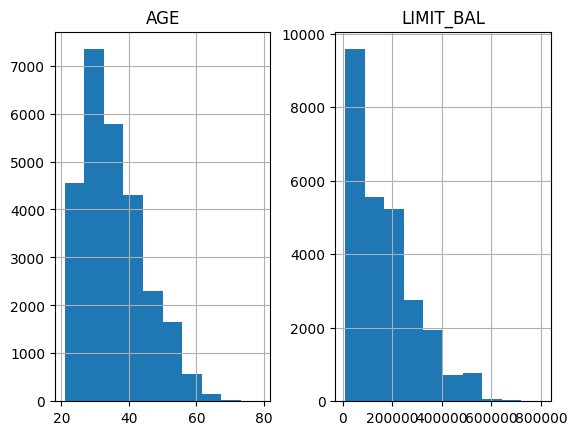

In [90]:
df_clean_2[['AGE','LIMIT_BAL']].hist();

### 6.3 Estatística descritiva de `AGE` e `LIMIT_BAL`

In [105]:
df_clean_2[['AGE','LIMIT_BAL']].describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,26664.0,35.505213,9.227442,21.0,28.0,34.0,41.0,79.0
LIMIT_BAL,26664.0,167919.054905,129839.453081,10000.0,50000.0,140000.0,240000.0,800000.0


### 6.4 Contagem de ocorrências por categoria em `EDUCATION`

In [92]:
df_clean_2['EDUCATION'].value_counts()

,count
EDUCATION,
2,12458
1,9412
3,4380
5,245
4,115
6,43
0,11


### 6.5 Transformar 0, 5 e 6 em outros (4)

In [93]:
df_clean_2['EDUCATION'] = df_clean_2['EDUCATION'].replace({0:4, 5:4, 6:4})
df_clean_2['EDUCATION'].value_counts()

,count
EDUCATION,
2,12458
1,9412
3,4380
4,414


### 6.6 Contagem de ocorrência por categoria em `MARRIAGE`

In [94]:
df_clean_2['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,14158
1,12172
3,286
0,48


### 6.7 Transformar 0 em outros (3)

In [95]:
df_clean_2['MARRIAGE'] = df_clean_2['MARRIAGE'].replace({0:3})
df_clean_2['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,14158
1,12172
3,334


### Características categóricas (experimento)

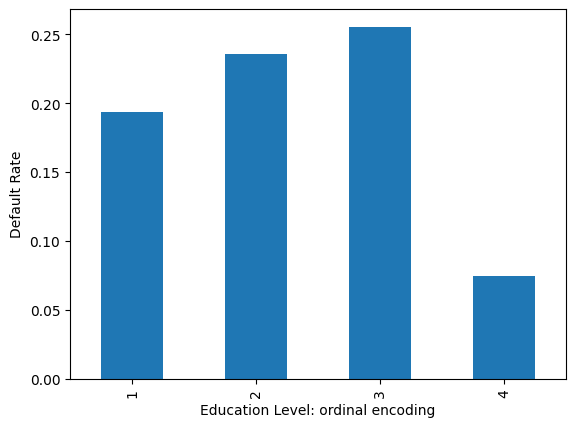

In [96]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default Rate')
plt.xlabel('Education Level: ordinal encoding');

## 7. Implementando a One-Hot Enconding (OHE) para uma característica categórica

### 7.1 Criando uma coluna vazia

In [97]:
df_clean_2['EDUCATION_CAT'] = 'none'

### 7.2 Examinando as primeiras 10 linhas

In [98]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


### 7.3 Criando um dicionário de mapeamento de categorias

In [99]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}
cat_mapping

{1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'}

### 7.4 Aplicando o mapeamento de categorias

In [100]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


### 7.5 Codificação de características com OHE

In [101]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'], dtype=int)
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


### 7.6 Concatenando o dataframe original com OHE

In [102]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [103]:
df_with_ohe.to_csv('chapter_1_cleaned_data.csv', index=False)

In [104]:
df_clean_2.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2
